# AceleraDev Codenation | Data Science - Semana 3

### Isabella Menezes Ramos

Colunas

* city: Cidade onde o imóvel está localizada / City where the property is located
* area: Area do imovel / Property area
* rooms: Numero de quartos/ Quantity of rooms
* bathroom: Numero de banheiros / Quantity of bathroom
* parking spaces: Numero de vagas / Quantity of parking spaces
* floor: Andar / Floor
* animal: Aceita animais? / Acept animals?
* furniture: Mobilhada? / Furniture?
* hoa: Valor do condominio / Homeowners association tax
* rent amount: Valor do Aluguel / Rent amount
* property tax: IPTU / Property tax
* fire insurance: Seguro Incendio / Fire Insurance
* total: Valor total / Total

### Importando os pacotes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Dados/houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [8]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [5]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema: Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [9]:
df.rename(columns={'rent amount (R$)' : 'valor_aluguel'}, inplace= True)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [11]:
df['valor_aluguel'].mean()

3896.247194163861

In [12]:
df['valor_aluguel'].median()

2661.0

Podemos observar que há outliers nessa coluna.

In [13]:
df['valor_aluguel'].std()

3408.5455176710675

O desvio padrão é quase o valor da média, com isso podemos dizer que os dados são muito esparsos.

In [15]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

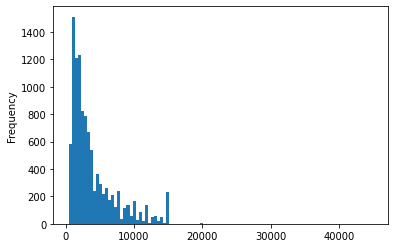

In [17]:
df['valor_aluguel'].plot(kind = 'hist',bins = 100)

In [20]:
#skewness - positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [19]:
#kurtosis - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

## Exploração multivariáveis

### Perguntas

- Qual a cidade com a média de aluguel mais alta?
- Quantos banheiros existem nas residências com alugueis mais altos?
- Os imóveis mais caros aceitam animal?
- Os imóveis mais caros são mobiliados?

In [21]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [25]:
#Qual a cidade com a média de aluguel mais alta?

df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [26]:
df.valor_aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [27]:
#Quantos banheiros existem em media nas residências com aluguéis mais altos?
## definicao: alugueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto ' if x > 5000 else 'Baixo' for x in df['valor_aluguel']] 

In [30]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [41]:
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [40]:
#Os imóveis mais caros aceitam animal?

df.groupby('aluguel_alto')['animal'].value_counts()

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
Baixo         acept        6232
              not acept    1921
Name: animal, dtype: int64

82% dos imóveis caros aceitam animais.

In [43]:
#Os imóveis mais caros são mobiliados?

df.groupby('aluguel_alto')['furniture'].value_counts()

aluguel_alto  furniture    
Alto          not furnished    1661
              furnished         878
Baixo         not furnished    6425
              furnished        1728
Name: furniture, dtype: int64

35% dos imóveis caros não são mobiliados.

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros, maior o valor do aluguel.
- Os imóveis com mobília tem o aluguel mais alto.

In [50]:
df[['valor_aluguel','bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [53]:
aux = pd.DataFrame({'colunas': df.columns, 'tipos' : df.dtypes})

In [56]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [65]:
for coluna in lista:
    print('---------------------------------------')
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method= 'spearman'))

---------------------------------------
area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
---------------------------------------
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
---------------------------------------
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
---------------------------------------
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
---------------------------------------
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
---------------------------------------
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_al

## Visualização de dados

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

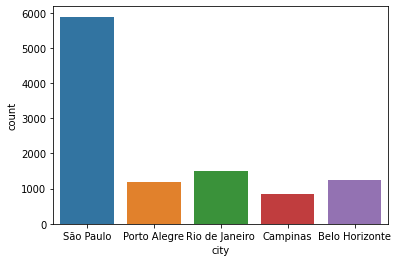

In [67]:
sns.countplot(x = 'city', data = df)

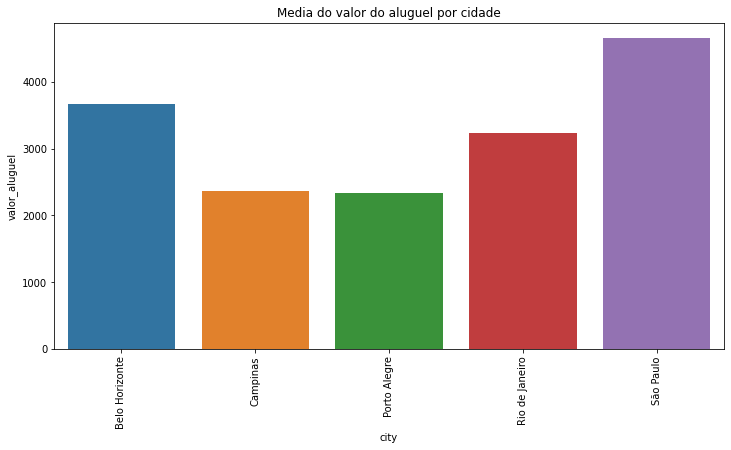

In [77]:
plt.figure(figsize = (12,6))
plt.title('Media do valor do aluguel por cidade')
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.xticks(rotation = 90)
plt.show()

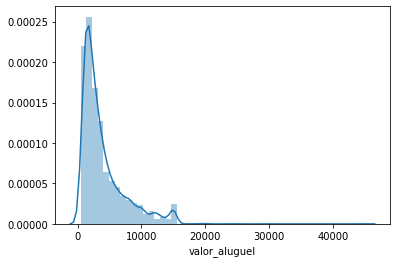

In [78]:
sns.distplot(df['valor_aluguel'])

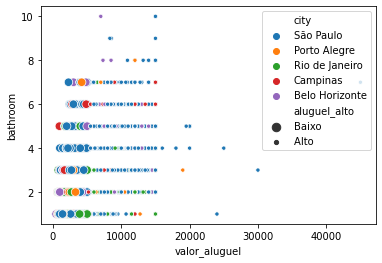

In [82]:
sns.scatterplot(x ='valor_aluguel', y = 'bathroom', data=df,hue = 'city',size = 'aluguel_alto')

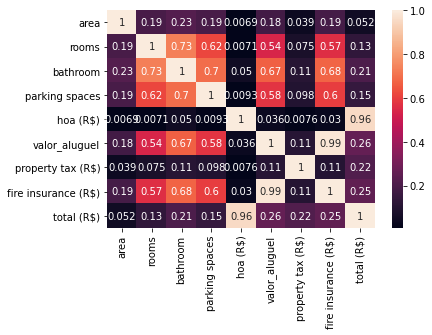

In [84]:
sns.heatmap(df.corr(),annot = True)

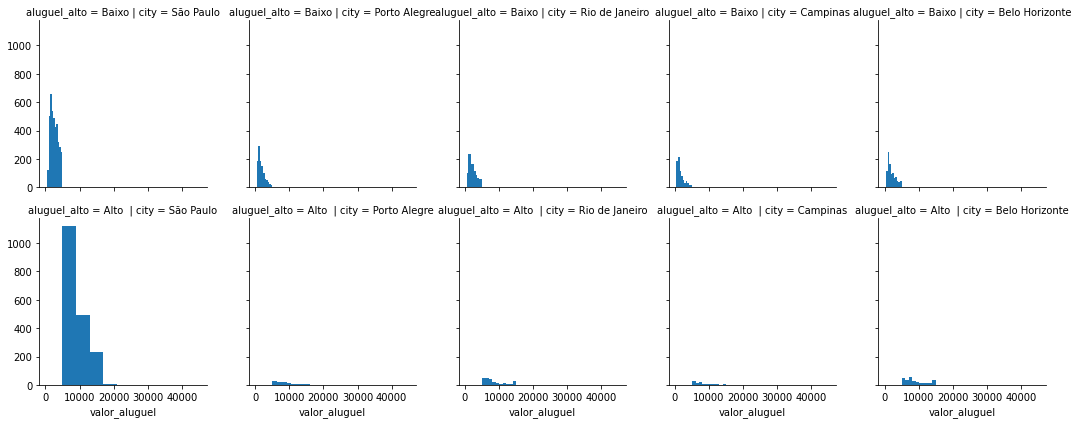

In [89]:
g = sns.FacetGrid(df,col='city',row='aluguel_alto')
g = g.map(plt.hist, "valor_aluguel")